# 02 Autograd

https://www.youtube.com/watch?v=c36lUUr864M

In [2]:
import torch 
import numpy as np

In [ ]:
x = torch.randn(3, requires_grad=True) # requires_grad default value is false
print(x)

tensor([-1.1054, -0.3341, -0.2540], requires_grad=True)


# Computational Graph

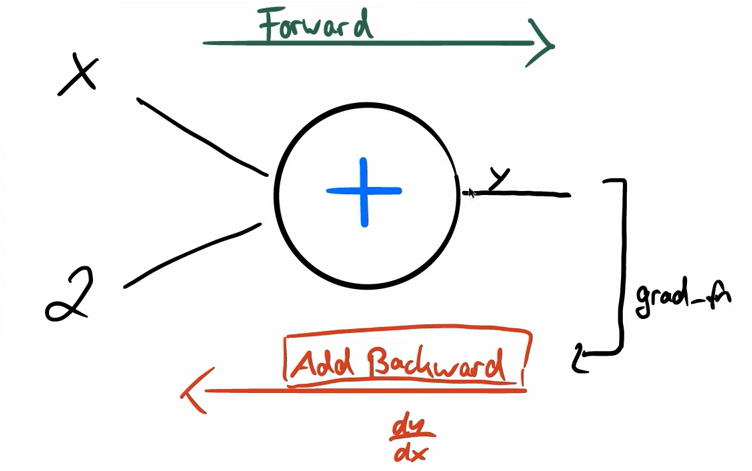

In [ ]:
y = x+2 # Torch will create a computational graph 

print(y) # You will see grad_fn (note function name)

tensor([0.8946, 1.6659, 1.7460], grad_fn=<AddBackward0>)


In [ ]:
z = y*y*2
z = z.mean() # mean will convert list to a scalar 
print(z)

tensor(4.4159, grad_fn=<MeanBackward0>)


In [ ]:
z.backward() # dz/dx
print(x.grad)

tensor([1.1929, 2.2211, 2.3280])


## Grad with give vector

**Normally the final output should be a scalar, but if the final output is not scalar, you need give a vector with the same shape of x**

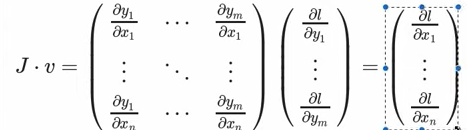

In [ ]:
v = torch.tensor([0.1, 1.0, 0.001], dtype=torch.float32)

m = y*y*2
print(m)

m.backward(v)
print(m)

print(x.grad)

tensor([1.6008, 5.5501, 6.0968], grad_fn=<MulBackward0>)
tensor([1.6008, 5.5501, 6.0968], grad_fn=<MulBackward0>)
tensor([ 1.9086, 15.5480,  2.3419])


# Remove grad feature from a tensor
*Three methods*

- x.requires_grad_(False)
- y = x.detach()
- with torch.no_grad():

# Demo, grad will accumulate

In [5]:
weights = torch.ones(4, requires_grad=True)

for epoch in range(3):
  model_output = (weights*3).sum()
  model_output.backward()

  print(weights.grad)


tensor([3., 3., 3., 3.])
tensor([6., 6., 6., 6.])
tensor([9., 9., 9., 9.])


# When in a loop, remember clean grad if you don't want to accumulate it 

In [7]:
weights = torch.ones(4, requires_grad=True)

for epoch in range(3):
  model_output = (weights*3).sum()
  model_output.backward()

  print(weights.grad.zero_()) # _ means inplace operation

tensor([0., 0., 0., 0.])
tensor([0., 0., 0., 0.])
tensor([0., 0., 0., 0.])
